# Class 5: Descriptive statistics and plots continued

In this notebook we continue our discussion of descriptive statistics and plots to visualize data.

In [16]:
import YData

# YData.download.download_class_code(5)   # get class 4 code    

# YData.download.download_class_code(5, True) # get the code with the answers 

There are also similar functions to download the homework:

In [17]:
# YData.download_homework(2)  # downloads the second homework 

If you are using google colabs, you should also uncomment and run the code below

In [18]:
# !pip install https://github.com/emeyers/YData_package/tarball/master
# from google.colab import drive
# drive.mount('/content/drive')

# Descriptive statistics and plot

## Motivation: The Bechdel Test 

The dataset we will use has information about movies, including whether each movie passed the [Bechdel test](https://en.wikipedia.org/wiki/Bechdel_test). 

The data comes from fivethirtyeight. For more information see: 
- https://fivethirtyeight.com/features/the-dollar-and-cents-case-against-hollywoods-exclusion-of-women/
- https://github.com/fivethirtyeight/data/tree/master/bechdel
- https://github.com/rfordatascience/tidytuesday/blob/master/data/2021/2021-03-09/readme.md

The code below loads the data and shows some of the data as a "pandas DataFrame" (we will discuss these DataFrames in a few weeks). 


In [19]:
import YData

YData.download_data("movies.csv")


The file `movies.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.


In [20]:
import pandas as pd

movies = pd.read_csv("movies.csv")
col_names_to_keep = ['year', 'imdb', 'title', 'clean_test', 'binary', 'budget',
       'domgross', 'budget_2013', 'domgross_2013', 'decade_code', 'imdb_id',
       'rated', 'imdb_rating', 'runtime',  'imdb_votes']
movies =   movies[col_names_to_keep]

movies.dropna(axis = 0, how = 'any', inplace = True, subset=col_names_to_keep[0:9])

movies.head()


,year,imdb,title,clean_test,binary,budget,domgross,budget_2013,domgross_2013,decade_code,imdb_id,rated,imdb_rating,runtime,imdb_votes
0,2013,tt1711425,21 &amp; Over,notalk,FAIL,13000000,25682380.0,13000000,25682380.0,1.0,1711425,NaN,NaN,NaN,NaN
1,2012,tt1343727,Dredd 3D,ok,PASS,45000000,13414714.0,45658735,13611086.0,1.0,1343727,NaN,NaN,NaN,NaN
2,2013,tt2024544,12 Years a Slave,notalk,FAIL,20000000,53107035.0,20000000,53107035.0,1.0,2024544,R,8.3,134 min,"143,446"
3,2013,tt1272878,2 Guns,notalk,FAIL,61000000,75612460.0,61000000,75612460.0,1.0,1272878,R,6.8,109 min,"87,301"
4,2013,tt0453562,42,men,FAIL,40000000,95020213.0,40000000,95020213.0,1.0,453562,PG-13,7.6,128 min,"43,608"


## Quantitative data: statistics and plots

Quantitative data is numeric data (e.g., ints and floats).
- We can visualize quantitative data using histograms and boxplots. 
- The main statistics we use to sumarize the central tendency of quantitative data are the mean and the median.  

Let's explore this by looking at data on movies. In particular, we will look at the following variables:
- `domgross_2013`: The amount of money a movie made at the box office (in 2013 inflation adjusted dollars)
- `domgross_2013`: The amount of money spent making the movie (in 2013 inflation adjusted dollars)
- `year`: The year the movie was made. 


In [21]:
# get these later with the quantitative data section
domgross_2013 = movies["domgross_2013"].to_list()
budget_2013 = movies["budget_2013"].to_list() 
year = movies["year"].to_list()

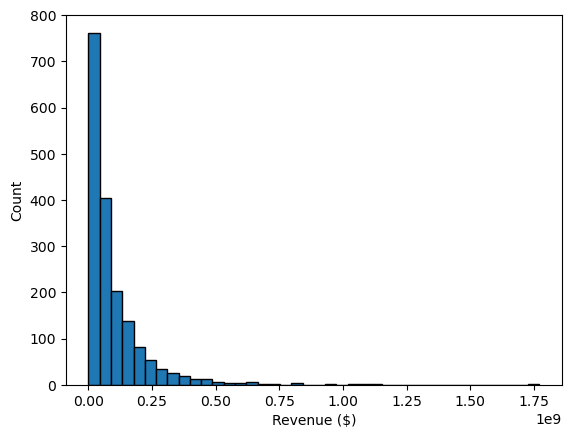

In [22]:
import matplotlib.pyplot as plt

# plot a histogram of movie revenues
plt.hist(domgross_2013, edgecolor = "k", bins = 40);
plt.ylabel("Count")
plt.xlabel("Revenue ($)");

In [23]:
# What is the average (mean) movie revenue?
tot_revenue = sum(domgross_2013)
ave_revenue = tot_revenue/len(domgross_2013)
f"The average revenue of movies is {ave_revenue:,.0f}"

'The average revenue of movies is 95,174,784'

In [24]:
# we can also use the statistics module to calculate statistics 
import statistics


In [25]:
# get the mean using the statistics package
statistics.mean(domgross_2013)


95174783.57601352

In [26]:
# get the median using the statistics package
statistics.median(domgross_2013)


55993640.5

In [40]:
# Sorting the original data "in place" using the list's .sort() method.
# This modifies the original domgross_2013 list so we should create a copy to save the unsorted list.

# create a copy of the data
domgross_2013_copy = domgross_2013.copy()

# sort the data "in-place" which modifies the original list
domgross_2013.sort()

# print the first 5 values of the sorted data
print(domgross_2013[0:5])

# print the length of the data
print(len(domgross_2013))

# get the half way index
half_index = int(len(domgross_2013)/2)
print(half_index)

# calculate the median, which is the average of the two middle values since there is an even number of data points
the_median = (domgross_2013[half_index -1] + domgross_2013[half_index])/2
print(the_median)

# Restore the original domgross_2013 list
domgross_2013 = domgross_2013_copy

# domgross_2013 = movies["domgross_2013"].to_list() # an alternative way to restore the original domgross_2013 list


[899.0, 4183.0, 4989.0, 9824.0, 16853.0]
1776
888
55993640.5


In [41]:
# A second way to sort the data which returns a new sorted list rather than modifying the original domgross_2013 list

# sort the data and return a new list of sorted values
sorted_domgross = sorted(domgross_2013)

# print the first 5 values of the sorted data
print(sorted_domgross[0:5])

# get the half way index
half_index = int(len(sorted_domgross)/2)
print(half_index)

# calculate the median, which is the average of the two middle values since there is an even number of data points
the_median = (sorted_domgross[half_index -1] + sorted_domgross[half_index])/2
print(the_median)

[899.0, 4183.0, 4989.0, 9824.0, 16853.0]
888
55993640.5


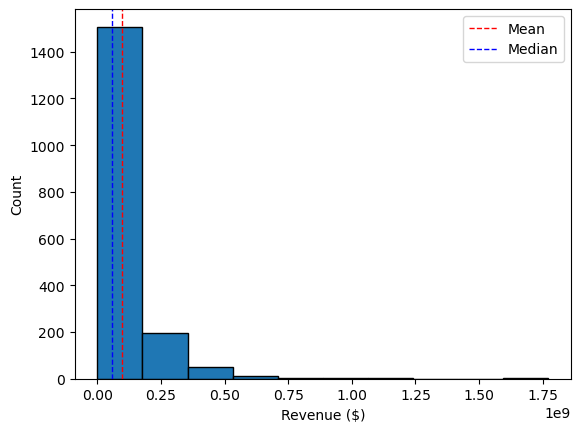

In [168]:
# plot the mean and the median on top of a histogram of salaries

plt.hist(domgross_2013, edgecolor = "k");
plt.ylabel("Count")
plt.xlabel("Revenue ($)");

plt.axvline(statistics.mean(domgross_2013), color='r', 
            linestyle='dashed', linewidth=1, label = "Mean");

plt.axvline(statistics.median(domgross_2013), color='b', 
            linestyle='dashed', linewidth=1, label = "Median");

plt.legend();


### Why is the mean larger than the median? 


In [169]:
# Some fake data
my_data = [2, 3, 5, 7, 100000]


In [170]:
# Get the mean 
statistics.mean(my_data)


20003.4

In [171]:
# Get the median
statistics.median(my_data)


5

## Outliers

Outliers are values that are much larger or smaller than the rest of the data. When an outlier occurs in a dataset we should investigate what might be causing the outlier.
- If it is due to a mistake (e.g., a data entry error) we can remove the outlier from our data.
- If it is a real value, we should understand how the value will impact our conclusions. 

Let's see if we can find the outlier in our movie revenue data. In particular, let's do the following:

1. We will use the `max()` to find the movie that had the highest revenue in the `domgross_2013` list
2. We will then use the `list.index()` method to find the index where this value occurs in the `domgross_2013` list
3. We can the use this index in the `title` list to get the movie title that has the maximum revenue



In [172]:
# Movie that had the highest revenue
max_revenue = max(domgross_2013)

# The index of where the highest revenue appears in the domgross_2013 list
index_max_revenue = domgross_2013.index(max_revenue)

# Print the index
print(index_max_revenue)

# Print the title of the movie at the corresponding index
print(title[index_max_revenue])



1742
Star Wars


## Meassures of spread: standard deviation and z-scores

Above we looked a measures of central, namely the mean and the median. Let's now look at statistics that measure how widely data is spread away from the mean. In particular, we will look at a commonly used measure called *the standard deviation* which is defined as:

$ s = \frac{1}{n-1}\sum_{i =1}^n (x_i - \bar{x})^2$

Where:
- $n$ is the number of data points you have
- $x_i$ is the $i^{th}$ data point
- $\bar{x}$ is the mean of the data

In Python, we can use the `stdev()` function from the statistics module to get the standard deviation



In [173]:
# Get the standard deviation of movie revenue

statistics.stdev(domgross_2013)

125965348.89270209

## z-scores 

Z-scores are used assess how many standard deviations a value is above or below the mean. Z-scores are defined as:

$z = \frac{x_i - \bar{x}}{s_x}$

Where:
- $\bar{x}$ is the mean of the data
- $x_s$ is the standard deviation of the data


In [174]:
# Calculate LeBron James' z-scores

z_FGPct = (0.510  -  0.464)/0.053
z_Points = (2111 - 	994)/414
z_Assists	 =  	(554 - 220)/170		
z_Steals	 =	(124 -  68.2)/31.5

print(f"Shooting % z-score: {z_FGPct:.3f}")
print(f"Points  z-score: {z_Points:.3f}")
print(f"Assists  z-score: {z_Assists:.3f}")
print(f"Steals  z-score: {z_Steals:.3f}")


Shooting % z-score: 0.868
Points  z-score: 2.698
Assists  z-score: 1.965
Steals  z-score: 1.771


In [175]:
# calculate z-sccore for star wars revenue (domgross_2013)

# Revenue of star wars
starwars_value = max(domgross_2013)

print(starwars_value)

# mean of all movies
movie_mean = statistics.mean(domgross_2013)

# standard deviation of all movies
movie_stdev = statistics.stdev(domgross_2013)

# star wars z-score
zscore_starwars = (starwars_value - movie_mean)/movie_stdev

zscore_starwars

1771682790.0


13.309279267364586

## Visualizing two quantitative variables

Let's create a scatter plot to visualize the relationship between a movies budget and the movie revenue made. 

Based on looking at this plot:
1. Does it appear that movies with larger budgets make more money at the box office?
2. What do you think the correlation is between buget and revenue? 


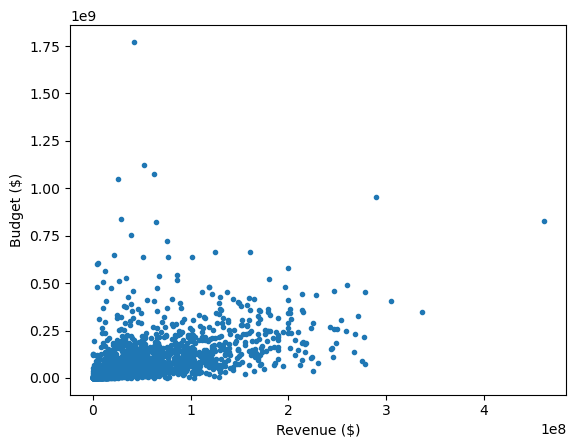

In [176]:
# plot revenue as a function of budget

plt.plot(budget_2013, domgross_2013, '.');
plt.ylabel("Budget ($)");
plt.xlabel("Revenue ($)");

In [177]:
# Calculate the correlation 

statistics.correlation(budget_2013, domgross_2013)

0.46126114596466505